<a href="https://colab.research.google.com/github/tinalmeid/CienciaDados/blob/main/Unidade__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resposta da Atividade da Aula Prática da Unidade 3

In [57]:
import sqlite3

#fazendo conexão com bd
conn = sqlite3.connect('dado_vendas.db')

#criando um cursor
cursor = conn.cursor()
import sqlite3

#fazendo conexão com bd
conn = sqlite3.connect('dado_vendas.db')

#criando um cursor
cursor = conn.cursor()

#criando a tabela
cursor.execute("""
CREATE TABLE venda_anual(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE NOT NULL,
    produto TEXT NOT NULL,
    categoria TEXT NOT NULL,
    valor_venda REAL NOT NULL
)
""")

#inserindo dados na tabela
cursor.execute("""
INSERT INTO venda_anual (data_venda, produto, categoria, valor_venda) VALUES
    ('2024-01-01', 'Cabo de carregador celular', 'Eletrônicos', 50.00),
    ('2024-01-05', 'Blusa Adulto', 'Roupas', 350.00),
    ('2024-02-10', 'Fone de ouvido', 'Eletrônicos', 120.00),
    ('2024-03-15', 'Craftsmanship Limpo', 'Livros', 200.00),
    ('2024-03-20', 'Mouse', 'Eletrônicos', 80.00),
    ('2024-04-02', 'Short', 'Roupas', 40.00),
    ('2024-05-05', 'Teclado', 'Eletrônicos', 120.00),
    ('2024-07-20', 'Meias', 'Roupas', 60.00),
    ('2024-08-25', 'Monitor', 'Eletrônicos', 700.00),
    ('2024-09-30', 'Entendendo Algoritmos', 'Livros', 300.00),
    ('2024-10-05', 'Moleton', 'Roupas', 450.00),
    ('2024-11-15', 'Carregador Portátil', 'Eletrônicos', 900.00),
    ('2024-12-20', 'Introdução à Linguagem SQL', 'Livros', 250.00);
""")

#confirmando a inserção
conn.commit()

#fechando a conexão
conn.close()

In [58]:
import pandas as pd
import sqlite3

# Conectar novamente ao banco
conn = sqlite3.connect('dado_vendas.db')

# Ler os dados da tabela 'venda' para um DataFrame
df_vendas = pd.read_sql_query("SELECT * FROM venda_anual", conn)

# Mostrar o DataFrame
print(df_vendas)

# Fechar a conexão
conn.close()

    id  data_venda                     produto    categoria  valor_venda
0    1  2024-01-01  Cabo de carregador celular  Eletrônicos         50.0
1    2  2024-01-05                Blusa Adulto       Roupas        350.0
2    3  2024-02-10              Fone de ouvido  Eletrônicos        120.0
3    4  2024-03-15         Craftsmanship Limpo       Livros        200.0
4    5  2024-03-20                       Mouse  Eletrônicos         80.0
5    6  2024-04-02                       Short       Roupas         40.0
6    7  2024-05-05                     Teclado  Eletrônicos        120.0
7    8  2024-07-20                       Meias       Roupas         60.0
8    9  2024-08-25                     Monitor  Eletrônicos        700.0
9   10  2024-09-30       Entendendo Algoritmos       Livros        300.0
10  11  2024-10-05                     Moleton       Roupas        450.0
11  12  2024-11-15         Carregador Portátil  Eletrônicos        900.0
12  13  2024-12-20  Introdução à Linguagem SQL     

In [18]:
#verifica se existe duplicidade, mantem o primeiro
df_vendas.drop_duplicates(keep='first', inplace=True)
print(df_vendas)

In [19]:
#verifica os valores de venda maior que 200.00
df_vendas[df_vendas['valor_venda'] > 200.00]

,id,data_venda,produto,categoria,valor_venda
1,2,2023-01-05,Blusa Adulto,Roupas,350.0
8,9,2023-08-25,Monitor,Eletrônicos,700.0
9,10,2023-09-30,Entendendo Algoritmos,Livros,300.0
10,11,2023-10-05,Moleton,Roupas,450.0
11,12,2023-11-15,Carregador Portátil,Eletrônicos,900.0
12,13,2023-12-20,Introdução à Linguagem SQL,Livros,250.0


In [20]:
#verifica as vendas de produtos da categoria Eletrônicos
df_vendas[df_vendas['categoria'] == 'Eletrônicos']

,id,data_venda,produto,categoria,valor_venda
0,1,2023-01-01,Cabo de carregador celular,Eletrônicos,50.0
2,3,2023-02-10,Fone de ouvido,Eletrônicos,120.0
4,5,2023-03-20,Mouse,Eletrônicos,80.0
6,7,2023-05-05,Teclado,Eletrônicos,120.0
8,9,2023-08-25,Monitor,Eletrônicos,700.0
11,12,2023-11-15,Carregador Portátil,Eletrônicos,900.0


In [22]:
#verifica as vendas de produtos da categoria livro para depois fazer a soma
df_vendas[df_vendas['categoria'] == 'Livros']

,id,data_venda,produto,categoria,valor_venda
3,4,2023-03-15,Craftsmanship Limpo,Livros,200.0
9,10,2023-09-30,Entendendo Algoritmos,Livros,300.0
12,13,2023-12-20,Introdução à Linguagem SQL,Livros,250.0


In [25]:
#calcula soma da coluna valor_venda de todos os produtos da categoria Livros
soma = df_vendas[df_vendas['categoria'] == 'Livros']['valor_venda'].sum()

#Exibindo a mensagem da soma
print(f"O valor total de vendas da categoria 'Livros' é: R$ {soma:.2f}")


O valor total de vendas da categoria 'Livros' é: R$ 750.00


In [26]:
#exibindo a venda de maior valor da categoria Roupas
df_vendas[df_vendas['categoria'] == 'Roupas'].max()

,0
id,11
data_venda,2023-10-05
produto,Short
categoria,Roupas
valor_venda,450.0


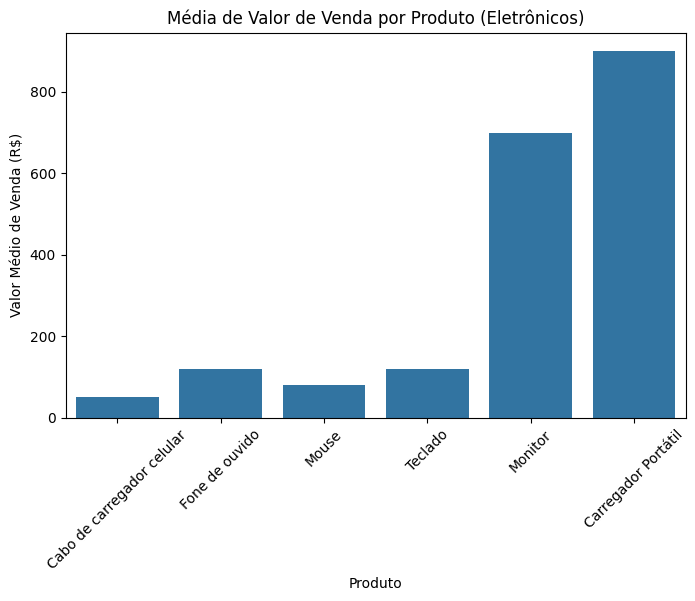

In [29]:
#importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#filtrando só os produtos de categoria eletrônico
eletronicos = df_vendas[df_vendas['categoria'] == 'Eletrônicos']

# Criando o gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x='produto', y='valor_venda', data=eletronicos, estimator='mean', errorbar=None)

#personalizando o gráfico
plt.title('Média de Valor de Venda por Produto (Eletrônicos)')
plt.xlabel('Produto')
plt.ylabel('Valor Médio de Venda (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

     categoria  valor_venda
0  Eletrônicos       1970.0
1       Livros        750.0
2       Roupas        900.0


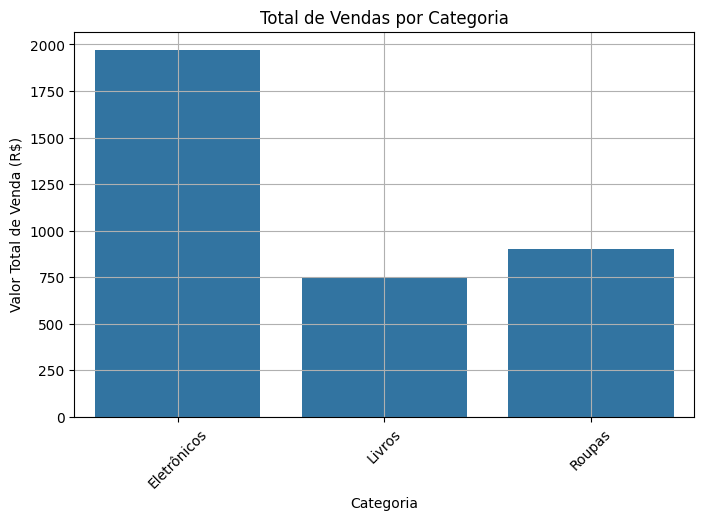

In [33]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

#Separando por categoria e somando o valor_venda
vendas_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()

# Exibindo o DataFrame das vendas por categoria
print(vendas_categoria)

# Criando o gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='categoria', y='valor_venda', data=vendas_categoria, legend=False)

# Personalizando o gráfico
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Venda (R$)')
plt.xticks(rotation=45)
plt.grid(True)

# Exibindo o gráfico
plt.show()

Quis pesquisar como faria para mostrar as vendas por mês


In [54]:
#separando por mês e somando os valores de venda
vendas_mes = df_vendas.groupby('nome_mes', observed=False)['valor_venda'].sum().reset_index()


In [55]:
# Definindo a ordem dos meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

# Convertendo a coluna 'nome_mes' para uma categoria com a ordem dos meses
df_vendas['nome_mes'] = pd.Categorical(df_vendas['nome_mes'], categories=meses_ordenados, ordered=True)

# Exibindo o DataFrame com vendas por mês na ordem correta
print(vendas_mes)

     nome_mes  valor_venda
0     January        400.0
1    February        120.0
2       March        280.0
3       April         40.0
4         May        120.0
5        June          0.0
6        July         60.0
7      August        700.0
8   September        300.0
9     October        450.0
10   November        900.0
11   December        250.0


Agora o gráfico

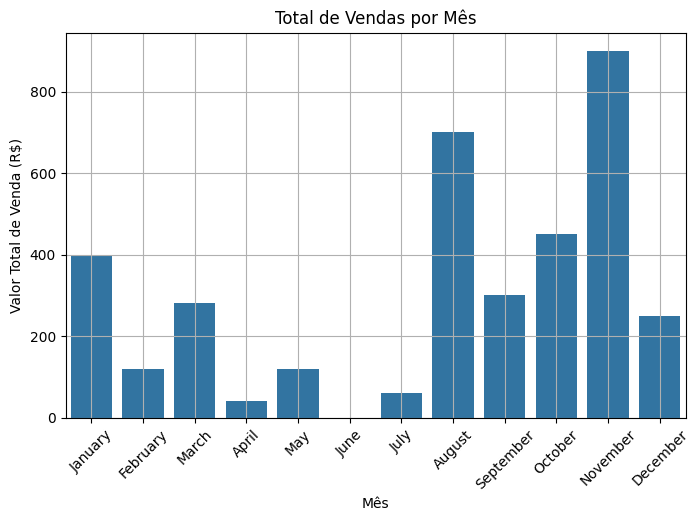

In [56]:
# Criando o gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='nome_mes', y='valor_venda', data=vendas_mes, legend=False)

# Personalizando o gráfico
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Venda (R$)')
plt.xticks(rotation=45)
plt.grid(True)

# Exibindo o gráfico
plt.show()